In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline
import matplotlib.pyplot as plt

url = 'https://covidtracking.com/api/v1/states/daily.csv'
states = pd.read_csv(url)

/Users/Justin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:

pop2 = pd.read_csv('http://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv')
pop2 = pop2[['NAME','POPESTIMATE2019']]
statecodes = pd.read_csv('statecodes.csv')
statepop=pd.merge(pop2,statecodes,left_on='NAME',right_on='State',how='inner')
statepop=statepop.drop(columns=['NAME','State','Abbrev'])
statesdf=pd.merge(states,statepop,left_on='state',right_on='Code',how='left')
statesdf['% population tested']=statesdf['total']/statesdf['POPESTIMATE2019']*100
statesdf['% positive over tested']=statesdf['positiveIncrease']/statesdf['totalTestResultsIncrease']*100
statesdf['% death over tested']=statesdf['death']/statesdf['total']*100
statesdf['% death over positive']=statesdf['death']/statesdf['positive']*100
statesdf['new deaths per capita']=statesdf['deathIncrease']/statesdf['POPESTIMATE2019']*1000000
statesdf['daily tests per capita']=statesdf['totalTestResultsIncrease']/statesdf['POPESTIMATE2019']*1000000
statesdf['current hospitalizations per capita']=statesdf['hospitalizedCurrently']/statesdf['POPESTIMATE2019']*1000000
statesdf['current ICU per capita']=statesdf['inIcuCurrently']/statesdf['POPESTIMATE2019']*1000000


statesdf.head()

date state  positive  probableCases   negative  pending  \
0  20201222    AK   43001.0            NaN  1172281.0      NaN   
1  20201222    AL  329811.0        61472.0  1532640.0      NaN   
2  20201222    AR  205048.0        32266.0  1785196.0      NaN   
3  20201222    AS       0.0            NaN     2140.0      NaN   
4  20201222    AZ  467215.0        20118.0  2233751.0      NaN   

  totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
0        totalTestsViral         1215282.0                  121.0   
1  totalTestsPeopleViral         1800979.0                 2527.0   
2        totalTestsViral         1957978.0                 1103.0   
3        totalTestsViral            2140.0                    NaN   
4        totalTestsViral         4690016.0                 4019.0   

   hospitalizedCumulative  ...  POPESTIMATE2019  Code  % population tested  \
0                   948.0  ...         731545.0    AK           166.125392   
1                 31305.0  ...        4903185.0    AL            37.984514   
2                 10651.0  ...        3017804.0    AR            65.950075   
3                     NaN  ...              NaN   NaN                  NaN   
4                 33619.0  ...        7278717.0    AZ            37.107721   

   % positive over tested  % death over tested % death over positive  \
0                3.061866             0.015963              0.451152   
1               46.628582             0.239040              1.349864   
2               22.973133             0.167718              1.627912   
3                     NaN             0.000000                   NaN   
4               18.676424             0.300818              1.739028   

  new deaths per capita daily tests per capita  \
0             13.669699           19554.504508   
1             12.848791            2177.768124   
2             14.248772            2799.717941   
3                   NaN                    NaN   
4             21.020188            4318.068693   

  current hospitalizations per capita  current ICU per capita  
0                          165.403359                     NaN  
1                          515.379289                     NaN  
2                          365.497560              116.972474  
3                                 NaN                     NaN  
4                          552.157750              129.555799  

[5 rows x 65 columns]

In [3]:
#clean the dataframe
sdf=statesdf.copy()
sdf=sdf.sort_values(by=['state','date'])
sdf['date']=sdf['date'].apply(lambda x: datetime.datetime.strptime(str(x),'%Y%m%d'))

startdate = datetime.datetime(2020, 3, 4)

sdf['days']=sdf['date'].apply(lambda x: (x-startdate).days)

keepcols=['date','state','positive','negative','totalTestResults','hospitalizedCurrently','hospitalizedCumulative',
          'inIcuCurrently','inIcuCumulative','recovered','death','% population tested','% positive over tested',
         '% death over tested','% death over positive','new deaths per capita','daily tests per capita','total','current hospitalizations per capita','current ICU per capita']
sdf=sdf[keepcols]
sdf.head()

date state  positive  negative  totalTestResults  \
16251 2020-03-06    AK       NaN       8.0               8.0   
16200 2020-03-07    AK       NaN      12.0              12.0   
16149 2020-03-08    AK       NaN      14.0              14.0   
16098 2020-03-09    AK       NaN      23.0              23.0   
16047 2020-03-10    AK       NaN      23.0              23.0   

       hospitalizedCurrently  hospitalizedCumulative  inIcuCurrently  \
16251                    NaN                     NaN             NaN   
16200                    NaN                     NaN             NaN   
16149                    NaN                     NaN             NaN   
16098                    NaN                     1.0             NaN   
16047                    NaN                     1.0             NaN   

       inIcuCumulative  recovered  death  % population tested  \
16251              NaN        NaN    0.0             0.001230   
16200              NaN        NaN    0.0             0.001914   
16149              NaN        NaN    0.0             0.002734   
16098              NaN        NaN    0.0             0.004374   
16047              NaN        NaN    0.0             0.004374   

       % positive over tested  % death over tested  % death over positive  \
16251                     NaN                  0.0                    NaN   
16200                     0.0                  0.0                    NaN   
16149                     0.0                  0.0                    NaN   
16098                     0.0                  0.0                    NaN   
16047                     NaN                  0.0                    NaN   

       new deaths per capita  daily tests per capita  total  \
16251                    0.0                0.000000      9   
16200                    0.0                5.467880     14   
16149                    0.0                2.733940     20   
16098                    0.0               12.302729     32   
16047                    0.0                0.000000     32   

       current hospitalizations per capita  current ICU per capita  
16251                                  NaN                     NaN  
16200                                  NaN                     NaN  
16149                                  NaN                     NaN  
16098                                  NaN                     NaN  
16047                                  NaN                     NaN

In [4]:
#sort by states with most cases.
statesorder=sdf.groupby('state',as_index=False).max().sort_values(by='positive',ascending=False)['state'].unique()

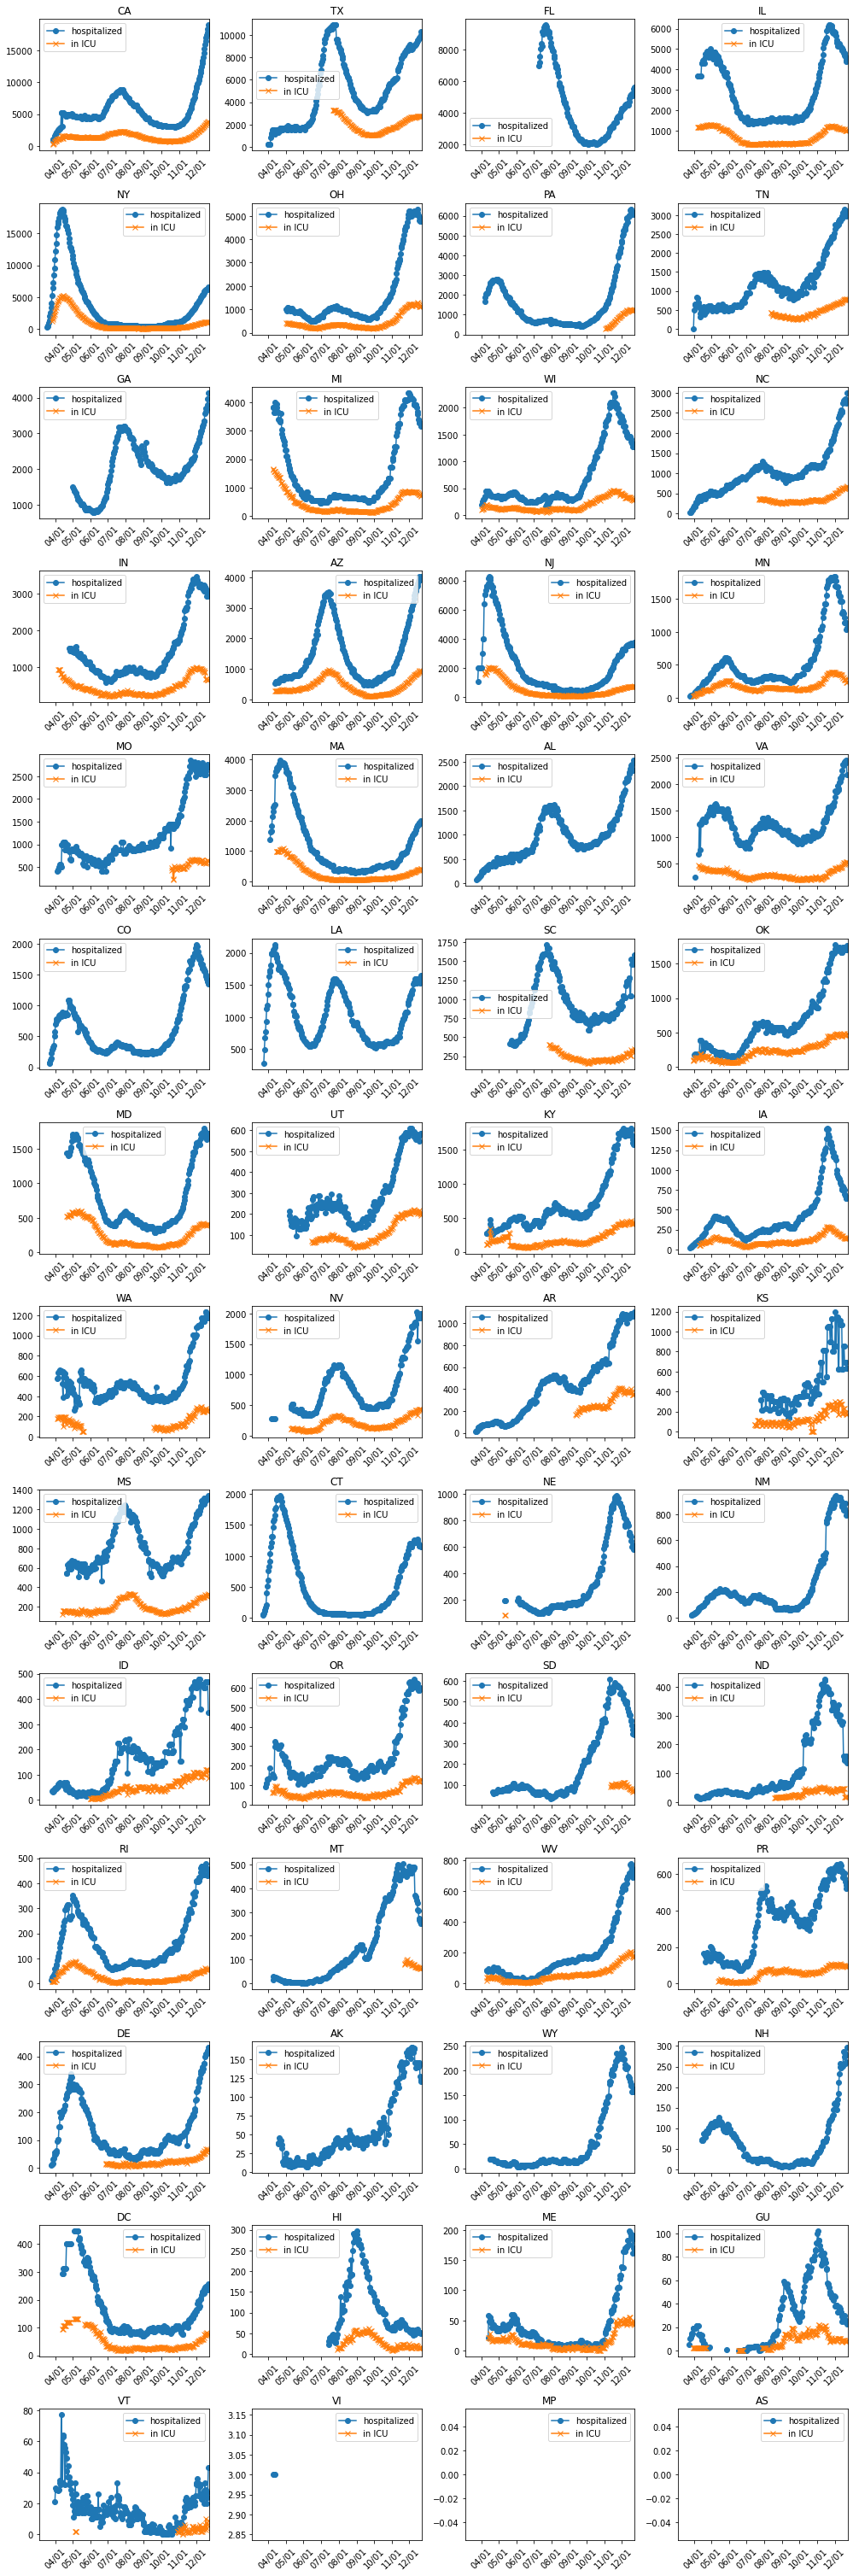

In [7]:
from matplotlib import dates as mdates
currentdate=datetime.datetime.now()

plt.rcParams.update({'font.size': 10})

def plotcurve(name, y, ax):
    ax.set_title(name)
    #ax.set_xlim(left='2020-03-04')
    ax.plot(y['date'],y['hospitalizedCurrently'],marker='o',label='hospitalized')
    ax.plot(y['date'],y['inIcuCurrently'],marker='x',label='in ICU')
    mindate=datetime.datetime.strptime('2020-03-04', '%Y-%m-%d')
    ax.set_xlim(left=mindate,right=currentdate)
    ax.set_xticklabels(y['date'],rotation=45)   
    ax.legend()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

ncols = 4
nrows = int(np.ceil(len(statesorder) / ncols))

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(14, nrows*3))
   
for ax,i in zip(axes.flat, statesorder):
    zz=sdf[sdf['state']==i]
    plotcurve(i, zz,ax)
        

fig.tight_layout()
fig.set_facecolor('w')
fig.savefig('hospitalcapacity.png')

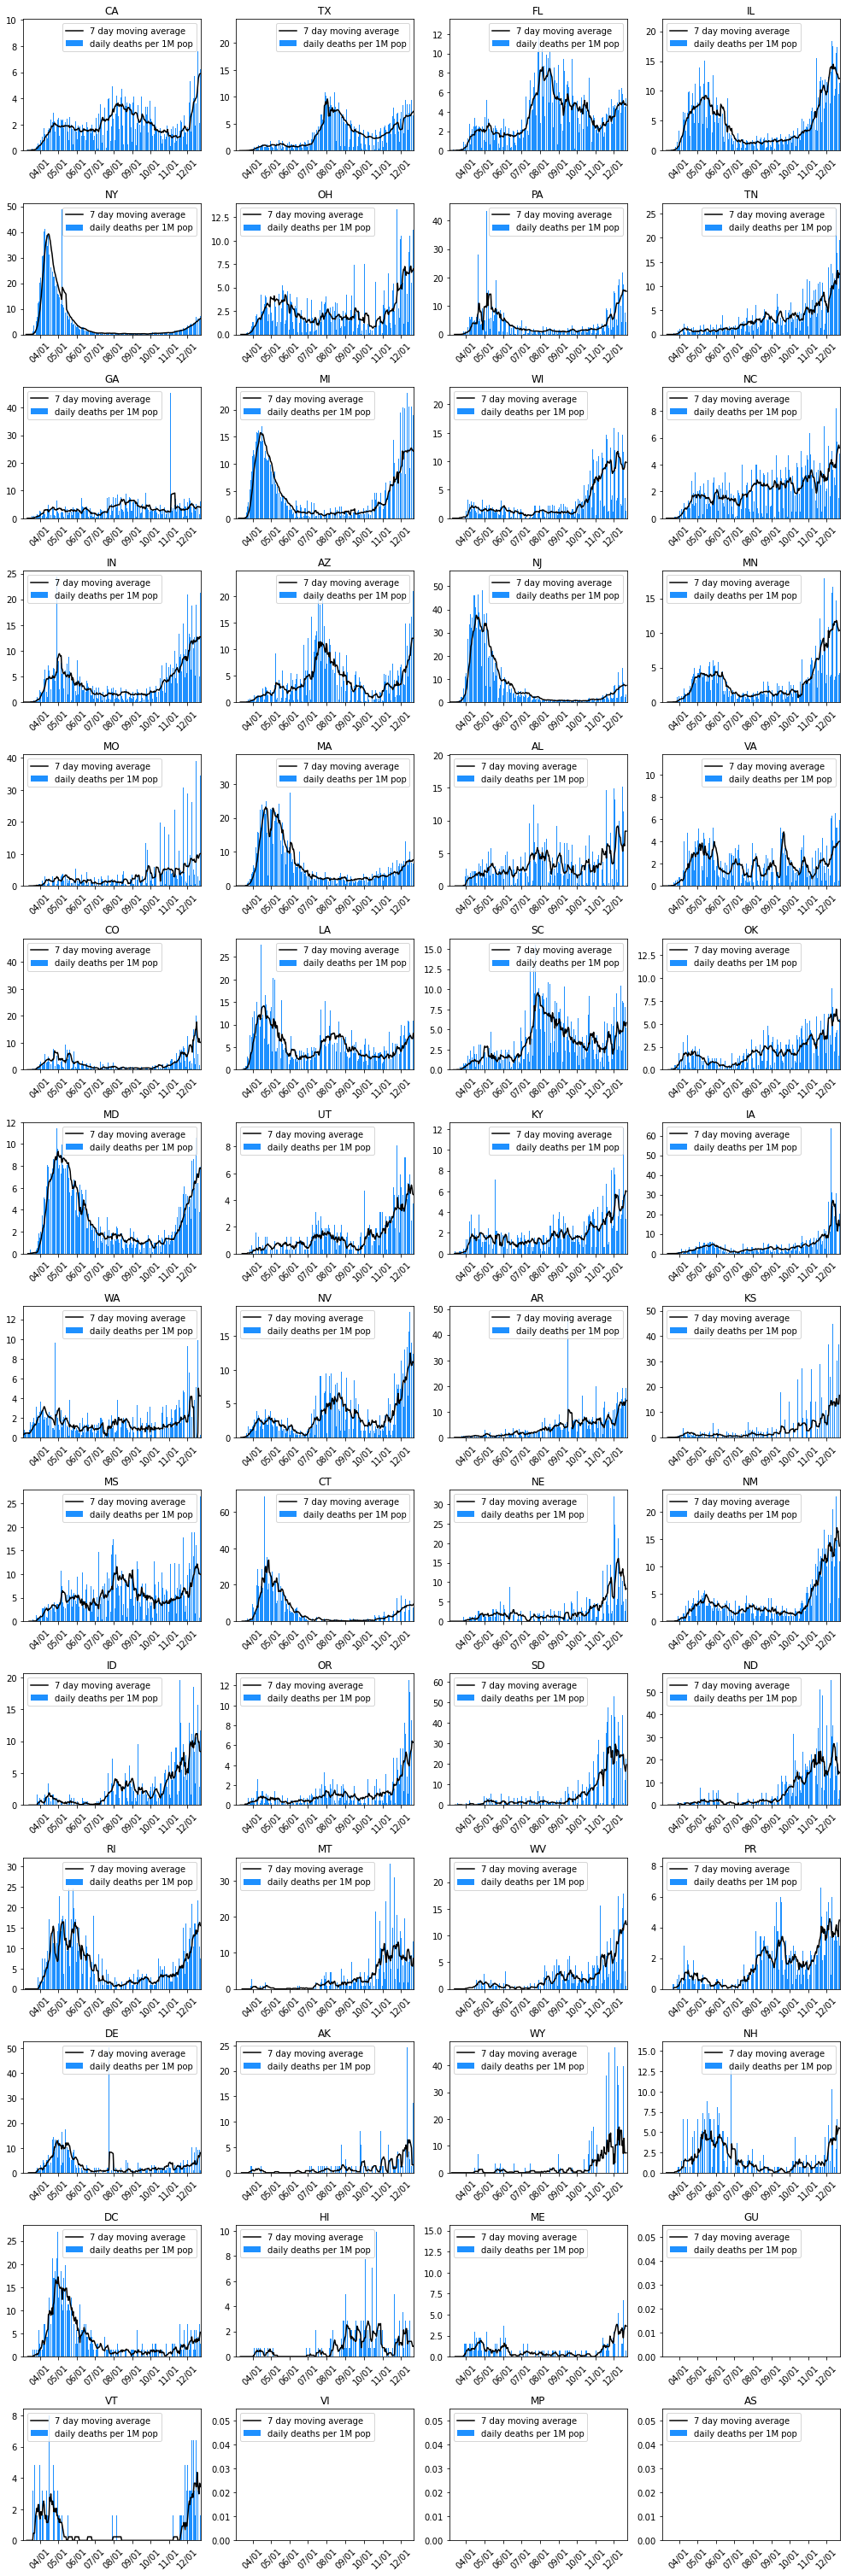

In [8]:
currentdate=datetime.datetime.now()
def plotcurve2(name, y, ax):
    rolling_mean = y['new deaths per capita'].rolling(window=7).mean().shift()
    
    ax.set_title(name)
    #ax.set_xlim(left='2020-03-04')
    ax.bar(y['date'],y['new deaths per capita'],label='daily deaths per 1M pop',color='dodgerblue')
    ax.plot(y['date'],rolling_mean,label='7 day moving average',color='black')
    mindate=datetime.datetime.strptime('2020-03-04', '%Y-%m-%d')
    ax.set_xlim(left=mindate,right=currentdate)
    ax.set_ylim(bottom=0)
    ax.set_xticklabels(y['date'],rotation=45)
   
    ax.legend()

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

ncols = 4
nrows = int(np.ceil(len(statesorder) / ncols))

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(14, nrows*3))
   
for ax,i in zip(axes.flat, statesorder):
    zz=sdf[sdf['state']==i]
    plotcurve2(i, zz,ax)
        

fig.tight_layout()
fig.set_facecolor('w')
fig.savefig('deathspercapita.png')

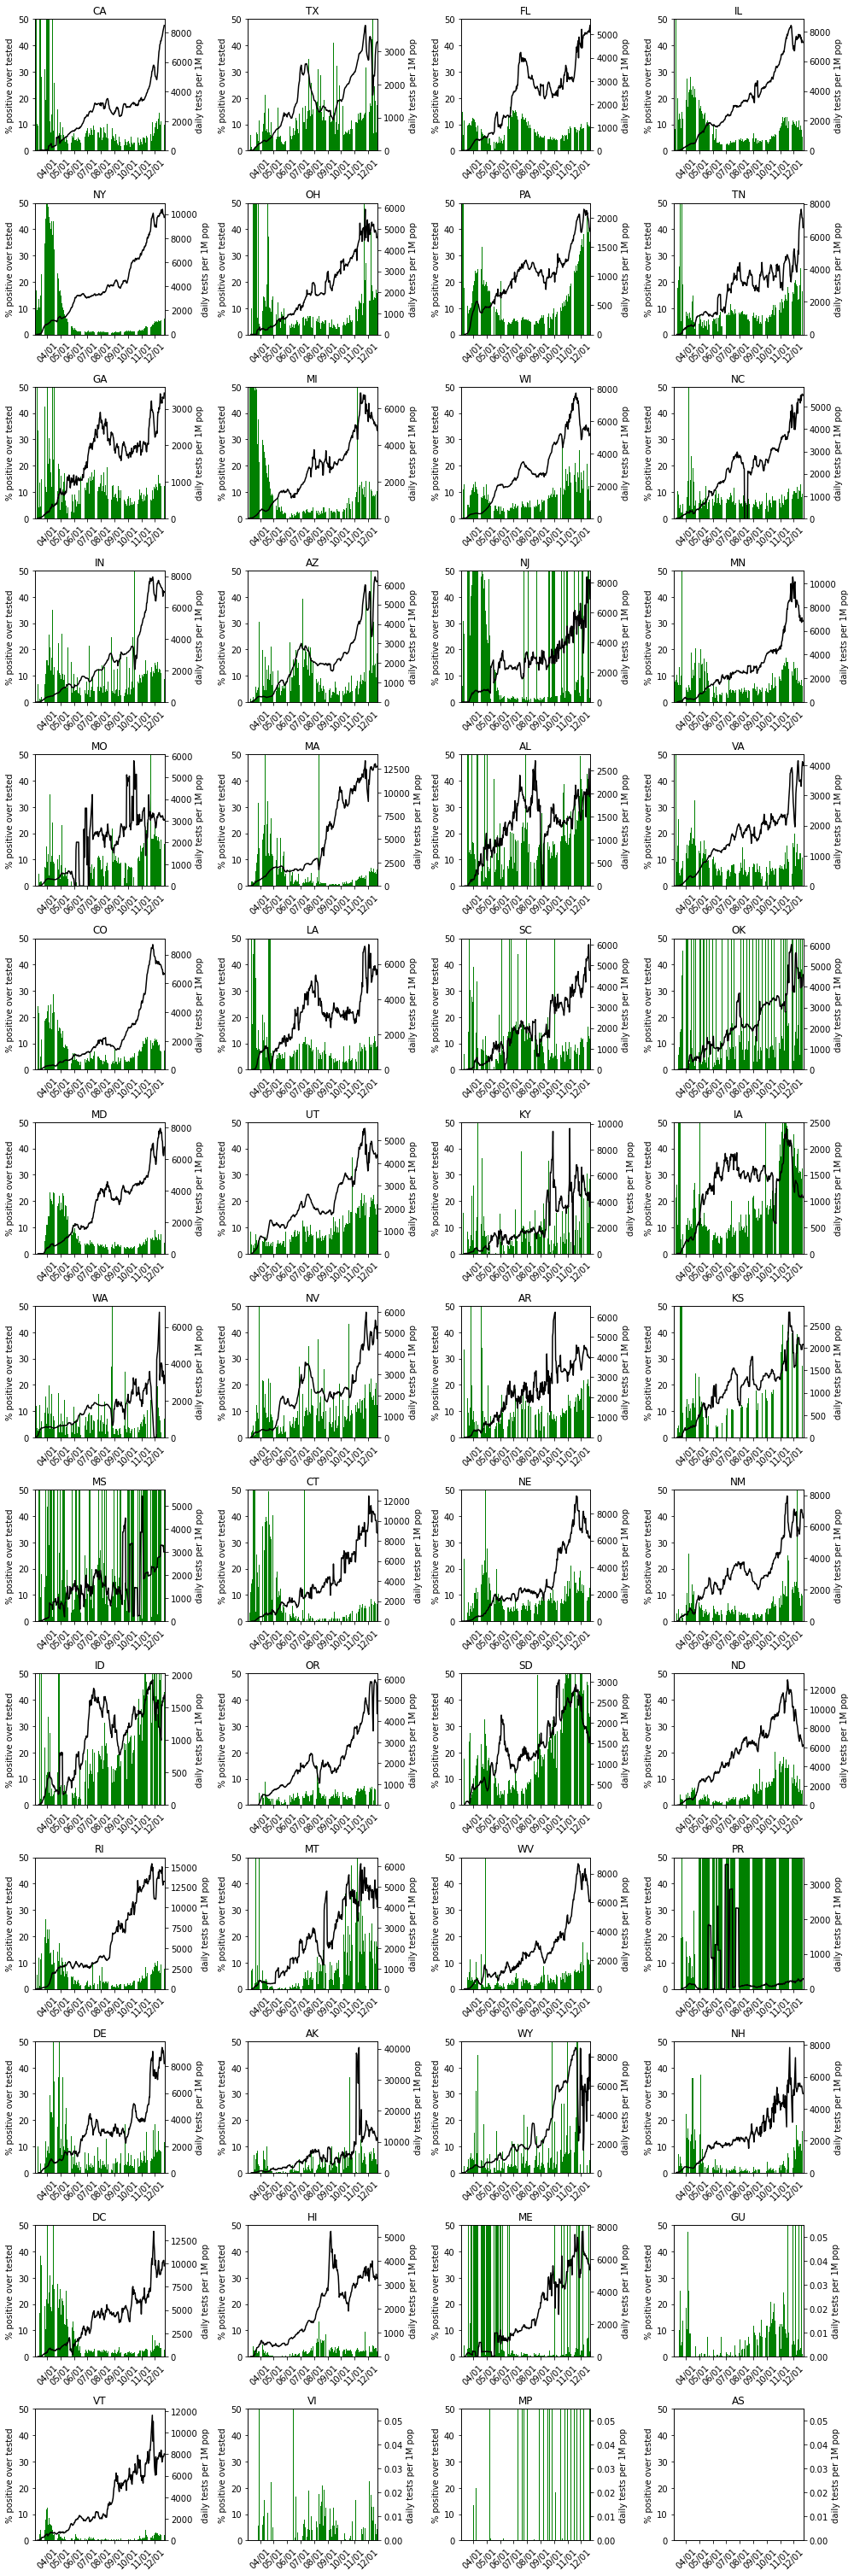

In [9]:
def plotcurve3(name, y, ax):
   # rolling_mean = y['new deaths per capita'].rolling(window=7).mean()
    
    #ax.plot(y['date'],rolling_mean,label='7 day moving average',color='black')
    
    
    ax.set_title(name)
    #ax.set_xlim(left='2020-03-04')
    p1 =ax.bar(y['date'],y['% positive over tested'],label='% positive',color='green')
   
    mindate=datetime.datetime.strptime('2020-03-04', '%Y-%m-%d')
    ax.set_xlim(left=mindate,right=currentdate)
    ax.set_ylim(bottom=0,top=50)
    
    ax.set_xticklabels(y['date'],rotation=45)
    ax.set_ylabel("% positive over tested")
   
    ax2 = ax.twinx()
    p2=ax2.plot(y['date'],y['daily tests per capita'].rolling(window=7).mean(),label='daily tests per 1M pop',color='black')
    ax2.set_ylim(bottom=0)
    ax2.set_ylabel("daily tests per 1M pop")
    ax.legend

    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    
ncols = 4
nrows = int(np.ceil(len(statesorder) / ncols))

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(14, nrows*3))
   
for ax,i in zip(axes.flat, statesorder):
    zz=sdf[sdf['state']==i]
    plotcurve3(i, zz,ax)

        

fig.tight_layout()
fig.set_facecolor('w')
fig.savefig('testpositiverates.png')

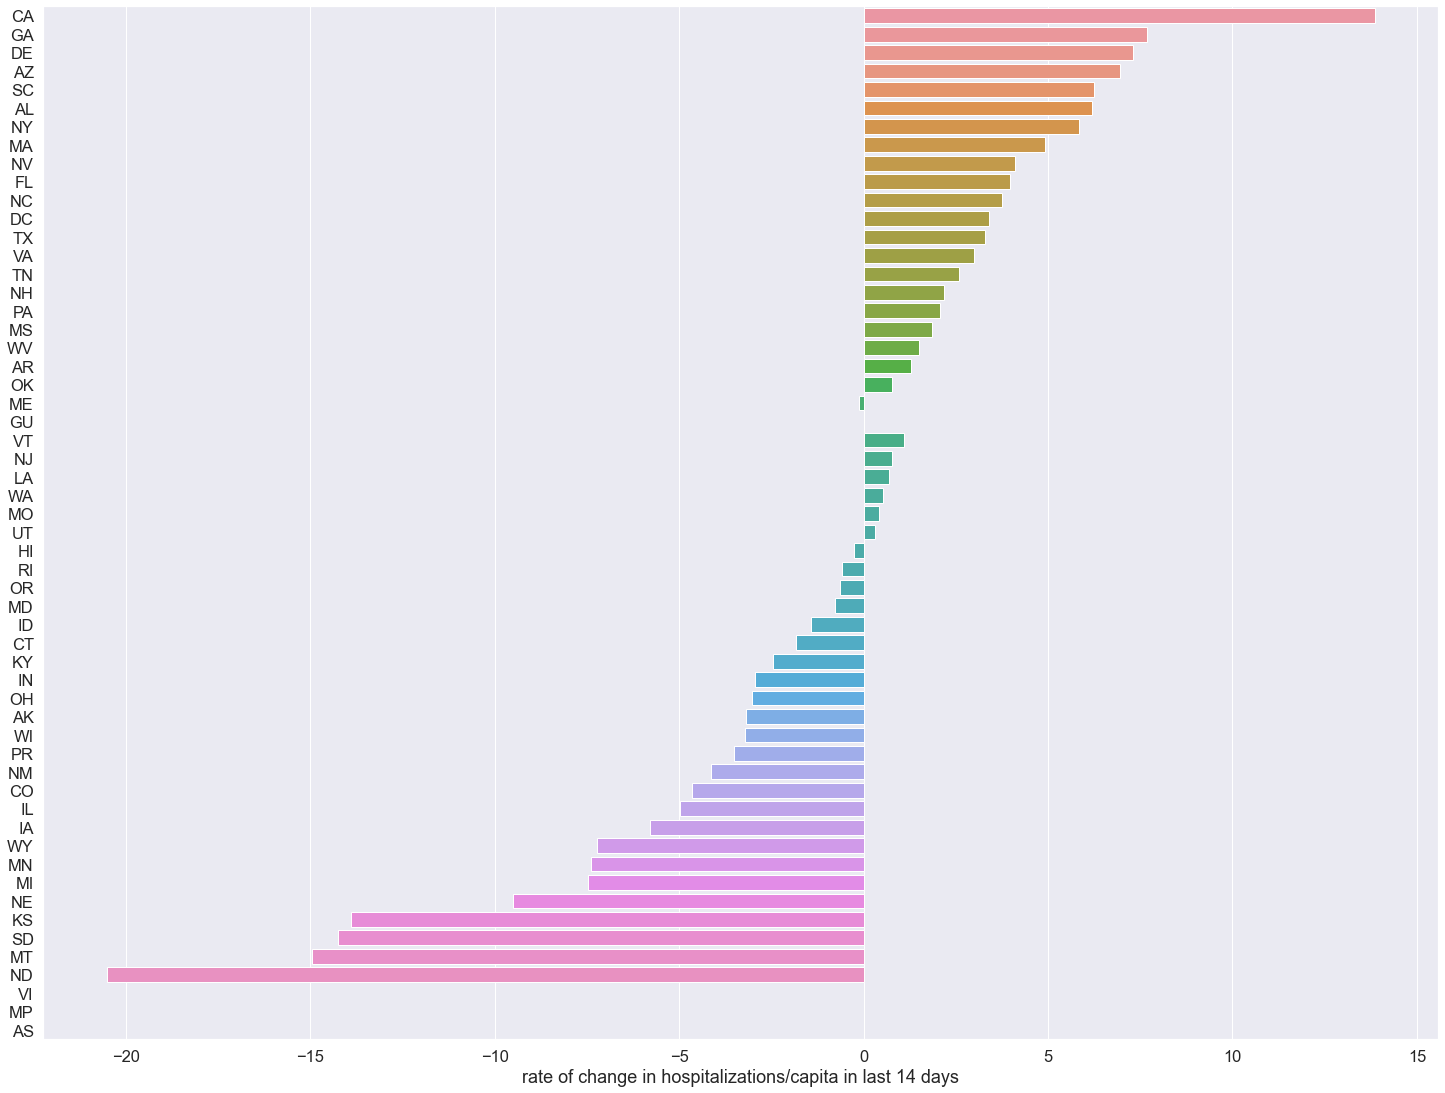

In [16]:
#calculate slopeof past 14 days hospitalizations
zdf=sdf.copy()
#filter out rows that fall within current date and 14 days back.
enddate=datetime.datetime.now()
startdate=datetime.datetime.now()-datetime.timedelta(days=14)
zdf=zdf[(zdf['date']<=enddate) & (zdf['date']>=startdate) ]

from scipy.stats import linregress
def seriesslope(s):
    #return range(len(s))
    x=np.array(range(len(s)))
    y=np.array(s)
    return linregress(x, y)[0]

def seriescurve(s):
    x=np.array(range(len(s)))
    y=np.array(s)
    return np.polyfit(x,y,2)[0]

def risingorfalling(s):
    if seriesslope(s) >0:
        print('rising!')
    else:
        print('falling!')

        
hospitalization_slopes=dict()        
for i in statesorder:
    zseries=zdf[zdf['state']==i]['current hospitalizations per capita']
    #print(i)
    #print(seriesslope(zseries))
    hospitalization_slopes[i]=seriesslope(zseries)  
zz=sorted(hospitalization_slopes.items(), key=lambda x:x[1],reverse=True    )
x=[i[0] for i in zz]
y=[i[1].round(2) for i in zz]#ax = 

sns.set(rc={'figure.figsize':(25,19)})
sns.set(font_scale = 1.5)
bx=sns.barplot(y,x) 
bx.set(xlabel='rate of change in hospitalizations/capita in last 14 days')
fig = bx.get_figure()
fig.savefig('state_hosp_changes_bar')
plt.show()
#can classify things as red, orange, yellow based on the slope of past 14 days.

In [14]:

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.io as pio


data = dict(
        type = 'choropleth',
        colorscale = 'YlOrRd',
        locations = x,
        locationmode = "USA-states",
        z = y,
        text = x,
        colorbar = {'title' : 'severity'},
      ) 

layout = dict(title = 'rate of change in hospitalizations/capita in last 14 days',
        geo = {'scope':'usa'})

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)
pio.write_html(choromap, file='state_hosp_changes_map.html', auto_open=True)  #positive over time

Ideas:

Make it into interactive plots.
Have a classification system. as in, heavy increase = RED. Plateauing = Orange. Decrease = Green.
